In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# 1. Load dataset
df = pd.read_csv('/content/steel_strength.csv')

print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (312, 17)
                                             formula     c    mn    si     cr  \
0  Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...  0.02  0.05  0.05   0.01   
1  Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....  0.18  0.01  0.01  13.44   
2  Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....  0.00  0.01  0.01   8.67   
3  Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...  0.01  0.05  0.05   0.01   
4  Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...  0.01  0.05  0.05   0.01   

      ni    mo     v     n    nb     co     w    al    ti  yield strength  \
0  19.70  2.95  0.01  0.00  0.01  15.00  0.00  0.15  1.55          2411.5   
1   0.01  3.01  0.46  0.04  0.01  19.46  2.35  0.04  0.00          1123.1   
2  13.45  0.82  0.01  0.00  0.01  13.90  0.00  0.39  0.57          1736.3   
3  17.70  3.95  0.01  0.00  0.01  15.00  0.00  0.13  1.47          2487.3   
4  19.40  1.45  0.01  0.00  0.01  14.90  0.00  0.13  1.55          2249.6   

   tensile strength  elon

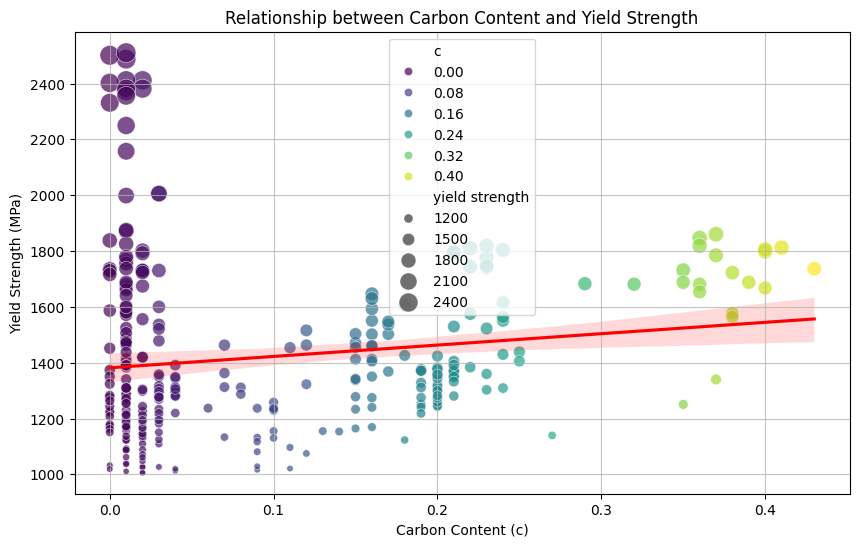

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='c', y='yield strength', data=df, hue='c', size='yield strength', sizes=(20, 200), palette='viridis', alpha=0.7)
sns.regplot(x='c', y='yield strength', data=df, scatter=False, color='red') # Add a regression line
plt.title('Relationship between Carbon Content and Yield Strength')
plt.xlabel('Carbon Content (c)')
plt.ylabel('Yield Strength (MPa)')
plt.grid(axis='both', alpha=0.75)
plt.show()

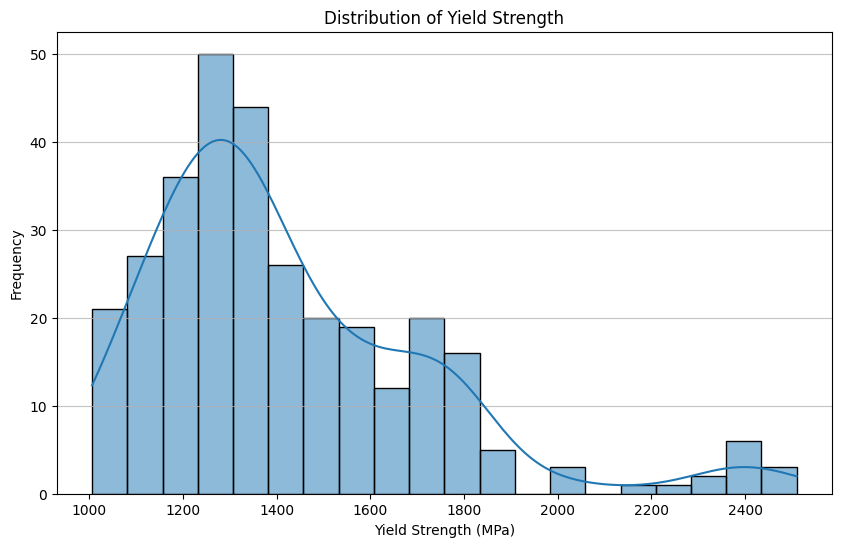

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(df['yield strength'], kde=True, bins=20)
plt.title('Distribution of Yield Strength')
plt.xlabel('Yield Strength (MPa)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [46]:
feature_cols = df.columns.drop(["yield strength", "formula", "tensile strength", "elongation"])
X = df[feature_cols]
y = df["yield strength"]

In [47]:
# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# 4. Models
models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=300, learning_rate=0.05, max_depth=6),
    "SVR": SVR()}

# Standard scaler for SVR
pipeline_svr = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())])


In [49]:
# 5. Train & Evaluate
def evaluate(model, model_name):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    print(f"\n {model_name} Results")
    print(" MAE:", round(mae, 3))
    print(" R² :", round(r2, 3))

    return model


trained_models = {}

for name, model in models.items():
    if name == "SVR":
        trained_models[name] = evaluate(pipeline_svr, name)
    else:
        trained_models[name] = evaluate(model, name)



 RandomForest Results
 MAE: 78.988
 R² : 0.822

 XGBoost Results
 MAE: 79.984
 R² : 0.816

 SVR Results
 MAE: 182.291
 R² : -0.027


In [50]:
# 7. Predict yield strength for a new steel sample
new_sample = pd.DataFrame([{
    "c": 0.22,
    "mn": 1.35,
    "si": 0.45,
    "cr": 0.5,
    "ni": 0.1,
    "mo": 0.15,
    "v": 0.12,
    "n": 0.0135,
    "nb": 0.023,
    "co": 0.18,
    "w": 0.37,
    "al": 0.008,
    "ti": 0.013
}])

prediction = trained_models['RandomForest'].predict(new_sample)[0]
print("\n Predicted Yield Strength (MPa):", round(prediction, 2))


 Predicted Yield Strength (MPa): 1296.48
